In [1]:
import h5py
import matplotlib.pyplot as plt
import numpy as np
import torch
from torchvision.utils import make_grid

In [3]:
print(torch.cuda.is_available())

True


In [2]:
case_slice = 'D:/jiwei/ACDC/data/slices/patient001_frame01_slice_2.h5'
case = 'D:/jiwei/ACDC/data/patient001_frame01.h5'
h5f_slice = h5py.File(case_slice, "r")
h5f = h5py.File(case, "r")

print(h5f_slice.keys())
print(h5f.keys())

ACDC_image_slice = np.array(h5f_slice["image"][:],dtype=np.float32)
ACDC_label_slice = np.array(h5f_slice["label"][:],dtype=np.uint8)
print(ACDC_image_slice.shape)
print(ACDC_label_slice.shape)

<KeysViewHDF5 ['image', 'label']>
<KeysViewHDF5 ['image', 'label']>
(256, 216)
(256, 216)


In [4]:
PALETTE1 = np.array([
    [0, 0, 0],
    [0, 0, 255],
    [0, 255, 0],
    [255, 0, 0],
])

def label_to_img(label):
    if isinstance(label, torch.Tensor):
        label = label.numpy()
    if not isinstance(label, np.ndarray):
        label = np.array(label)
    label = label.astype(np.uint8)
    label[label == 255] = 0
    img = PALETTE1[label]
    if len(img.shape) == 4:
        img = torch.tensor(img).permute(0, 3, 1, 2)
        img = make_grid(tensor=img, nrow=2, scale_each=True)
        img = img.permute(1, 2, 0).numpy()
    return img.astype(np.uint8)

(256, 216, 3)


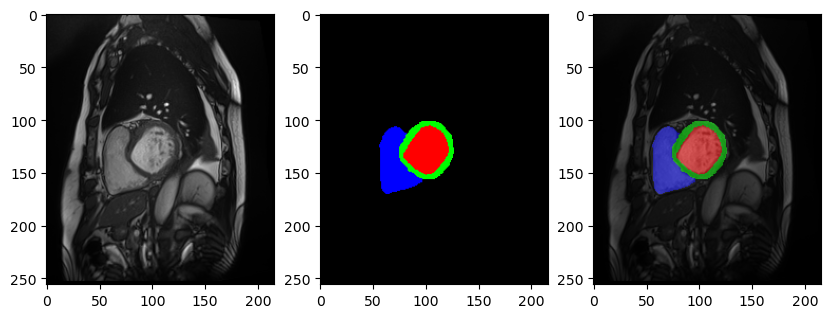

In [74]:
plt.figure(figsize=(10,10))

plt.subplot(1, 3, 1)  
plt.imshow(ACDC_image_slice, cmap='gray')  # 原始图像，使用灰度色彩映射

plt.subplot(1, 3, 2)  
ACDC_label_slice_img = label_to_img(ACDC_label_slice)
print(ACDC_label_slice_img.shape)
plt.imshow(ACDC_label_slice_img, cmap='viridis')  # 标签图像，使用自定义色彩映射，可以更改为其他颜色映射

plt.subplot(1, 3, 3) 
alpha = 0.5  # 设置透明度，可以根据需要调整
# 显示原始图像
plt.imshow(ACDC_image_slice, cmap='gray')  # 原始图像，使用灰度色彩映射
# 显示带有透明度的标签图像，实现重叠效果
plt.imshow(ACDC_label_slice_img, alpha=alpha, cmap='viridis')  # 标签图像，使用自定义色彩映射，可以更改为其他颜色映射

In [75]:
from PIL import Image

In [76]:
img_dir = 'E:/dataset/LIDC/image_roi/LIDC_0000.png'
ann_dir = 'E:/dataset/LIDC/mask_roi/LIDC_Mask_0000.png'

LIDC_image = np.array(Image.open(img_dir).convert("RGB"), dtype=np.float32)
LIDC_mask = np.array(Image.open(ann_dir).convert("L"), dtype=np.uint8)
image = LIDC_image.astype('float32') / 255
LIDC_mask[LIDC_mask == 255] = 1

In [77]:
PALETTE2 = np.array([
    [0, 0, 0],
    [255, 255, 255],
])
def label_to_img(label):
    if isinstance(label, torch.Tensor):
        label = label.cpu().numpy()
    if not isinstance(label, np.ndarray):
        label = np.array(label)
    label = label.astype(np.uint8)
    label[label == 255] = 0
    img = PALETTE2[label]
    if len(img.shape) == 4:
        img = torch.tensor(img).permute(0, 3, 1, 2)
        img = make_grid(tensor=img, nrow=8, scale_each=True)
        img = img.permute(1, 2, 0).numpy()

    return img.astype(np.uint8)

In [78]:
LIDC_label_slice_img = label_to_img(LIDC_mask)
LIDC_label_slice_img.shape

(64, 64, 3)

In [79]:
LIDC_image = LIDC_image.swapaxes(0, 1)
print(LIDC_image.shape)
LIDC_image = LIDC_image.swapaxes(2, 0)
print(LIDC_image.shape)

(64, 64, 3)
(3, 64, 64)


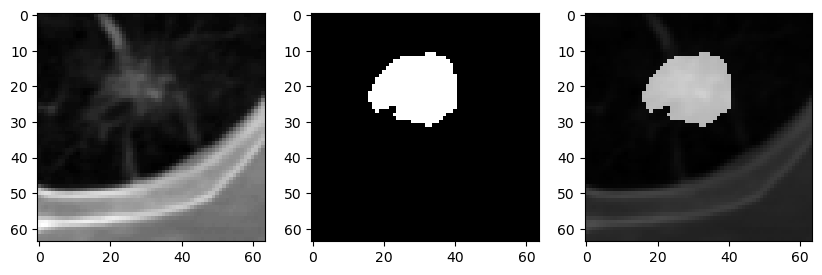

In [80]:
plt.figure(figsize=(10,10))

plt.subplot(1, 3, 1)  # 1 rows, 3 column, and select the 1st subplot
plt.imshow(LIDC_image[0,...],cmap='gray')

plt.subplot(1, 3, 2)  # 1 rows, 3 column, and select the 2nd subplot
LIDC_label_slice_img = label_to_img(LIDC_mask)
plt.imshow(LIDC_label_slice_img,cmap='viridis')

plt.subplot(1, 3, 3)  # 1 rows, 3 column, and select the 3nd subplot
alpha = 0.7  # 设置透明度，可以根据需要调整
# 显示原始图像
plt.imshow(LIDC_image[0], cmap='gray')  # 原始图像，使用灰度色彩映射
# 显示带有透明度的标签图像，实现重叠效果
plt.imshow(LIDC_label_slice_img, alpha=alpha, cmap='viridis')  # 标签图像，使用自定义色彩映射，可以更改为其他颜色映射